# EE Benchmark Experiment

## Initialisation

In [1]:
import re
import csv
import numpy as np
from decimal import Decimal
from glob import glob
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d


def show(benchmark_name):
    # plt config
    fig = plt.figure(figsize=(12, 8), dpi=100)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    fig.suptitle(benchmark_name, fontsize=18, y=0.95)
    ax1.set_title('Distance')
    ax2.set_title('Distance in log 10')
    ax3.set_title('Filtered distance')
    ax4.set_title('Filtered distance in log 10')
    fig.text(0.5, 0.04, 'Number of optimization steps', ha='center', fontsize=12)
    fig.text(0.06, 0.5, 'Distance from optimum coordinate', va='center', rotation='vertical', fontsize=12)
    
    data = {}
    paths = glob(f'./data/{benchmark_name}_*/result.csv')
    paths.sort()
    for path in paths:
        optimizer_name = re.search(r'./data/.+_(.+)/result\.csv', path).group(1)
        with open(path) as f:
            rows = np.array([row for row in csv.reader(f)])
        row = rows[1:, 1:]
        row = row.reshape(len(row))
        row = row.astype(np.float)
        data[optimizer_name] = row

    # modifiy xs and ys and plot
    for optimizer_name, y in data.items():
        x = np.arange(0, len(y) * 100, 100)
        log10_y = np.log10(y)
        filtered_y = gaussian_filter1d(y, sigma=5)
        filtered_log10_y = gaussian_filter1d(log10_y, sigma=5)
        
        ax1.plot(x, y, label=optimizer_name)
        ax2.plot(x, log10_y, label=optimizer_name)
        ax3.plot(x, filtered_y, label=optimizer_name)
        ax4.plot(x, filtered_log10_y, label=optimizer_name)

    # show entire graph
    plt.subplots_adjust(wspace=0.15)
    plt.legend(bbox_to_anchor=(1.4, 2.2), loc='upper right', borderaxespad=1)
    plt.show()


def show_minstd(benchmark_name):
    # plt config
    fig = plt.figure(figsize=(12, 4), dpi=100)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.suptitle(benchmark_name, fontsize=18, y=1.02)
    ax1.set_title('Minimum distance')
    ax2.set_title('Standard deviation on distance')
    
    data = {}
    paths = glob(f'./data/{benchmark_name}_*/result.csv')
    paths.sort()
    for path in paths:
        optimizer_name = re.search(r'./data/.+_(.+)/result\.csv', path).group(1)
        with open(path) as f:
            rows = np.array([row for row in csv.reader(f)])
        row = rows[1:, 1:]
        row = row.reshape(len(row))
        row = row.astype(np.float)
        data[optimizer_name] = row
    
    optimizer_names, ys = list(data.keys()), list(data.values())
    min_ys = [np.min(y) for y in ys]
    std_ys = [np.std(y) for y in ys]
    x = [i for i in range(len(ys))]
    
    ax1.bar(x, min_ys, align='center', tick_label=optimizer_names)
    ax2.bar(x, std_ys, align='center', tick_label=optimizer_names)
    ax1.set_xticklabels(optimizer_names, rotation=45)
    ax2.set_xticklabels(optimizer_names, rotation=45)

    # show entire graph
    plt.show()

    
def show_time():
    # plt config
    fig = plt.figure(figsize=(12, 16), dpi=100)
    fig.suptitle('Time', fontsize=18, y=0.92)
    fig.text(0.5, 0.08, 'Number of optimization steps', ha='center', fontsize=12)
    fig.text(0.06, 0.5, 'Time in seconds', va='center', rotation='vertical', fontsize=12)
    
    def get_data(benchmark_name):
        data = {}
        paths = glob(f'./data/{benchmark_name}_*/time.csv')
        paths.sort()
        for path in paths:
            optimizer_name = re.search(r'./data/.+_(.+)/time\.csv', path).group(1)
            with open(path) as f:
                rows = np.array([row for row in csv.reader(f)])
            row = rows[1:, 1:]
            row = row.reshape(len(row))
            row = row.astype(np.float)
            data[optimizer_name] = row
        return data
    
    benchmark_names = ('ackley', 'bukin', 'levi', 'rastrigin', 'rosenbrock')
    for i, benchmark_name in enumerate(benchmark_names):
        ax = fig.add_subplot(int('32' + str(i + 1)))
        ax.set_title(benchmark_name)
        
        data = get_data(benchmark_name)
        for optimizer_name, y in data.items():
            x = np.arange(0, len(y) * 100, 100)
            ax.plot(x, y, label=optimizer_name)
    
    # show entire graph
    plt.legend(bbox_to_anchor=(2.6, 3.4), loc='upper right', borderaxespad=1)
    plt.show()

## Main Results



### Ackley

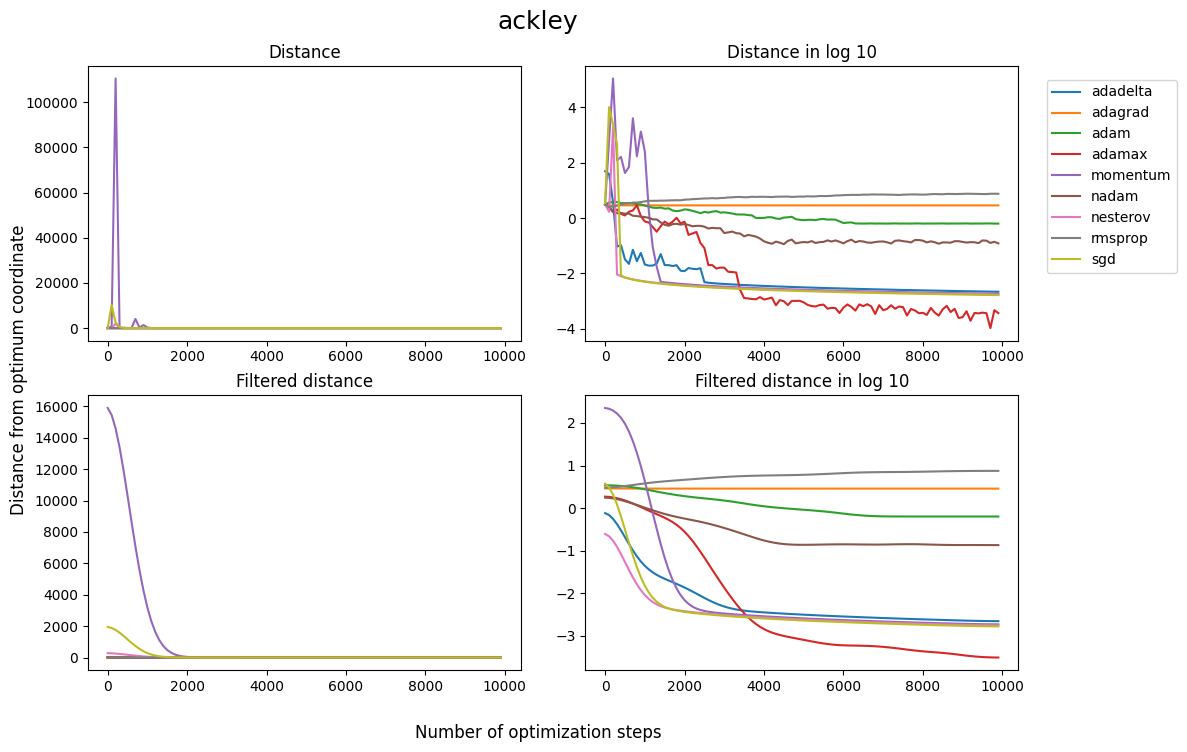

In [3]:
show('ackley')

### Bukin

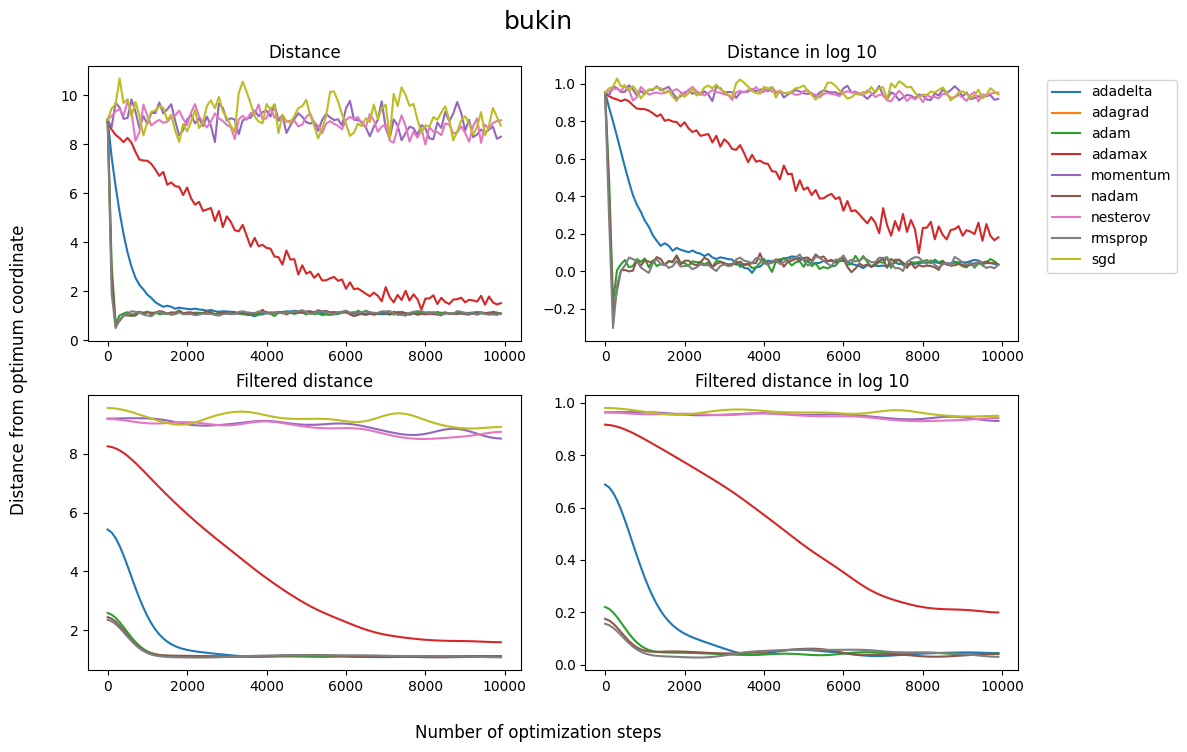

In [4]:
show('bukin')

### Rosenbrock

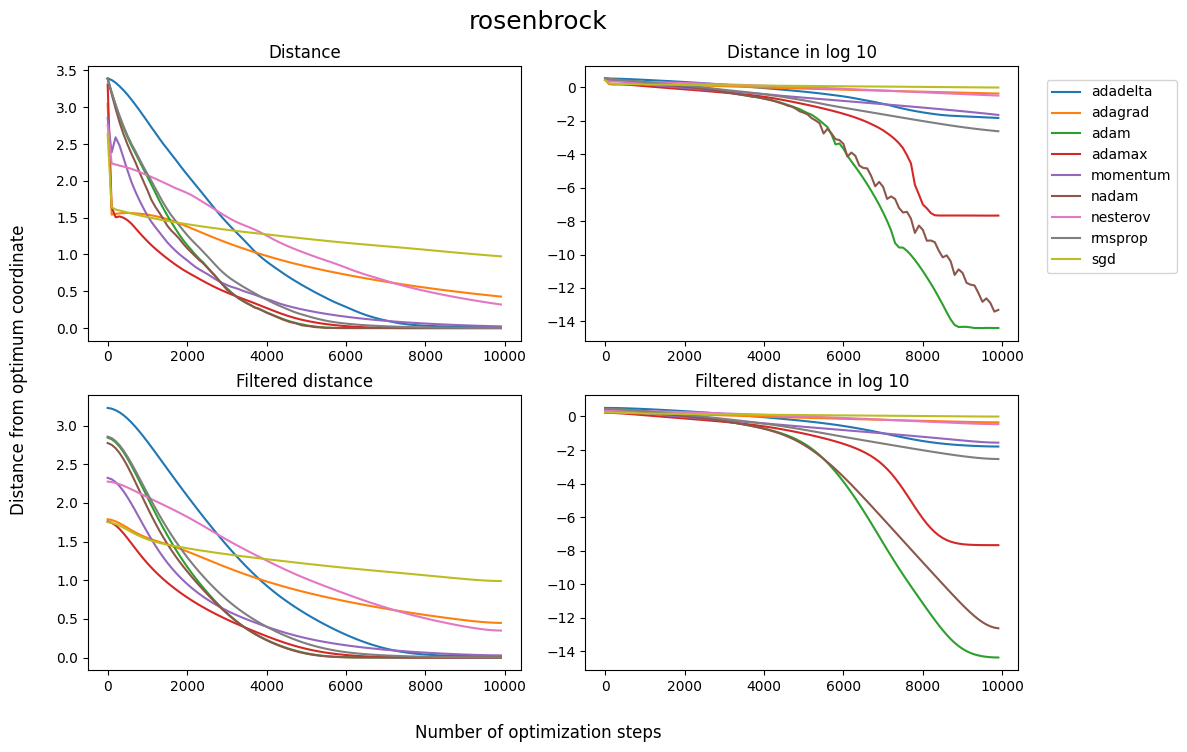

In [5]:
show('rosenbrock')

### Levi

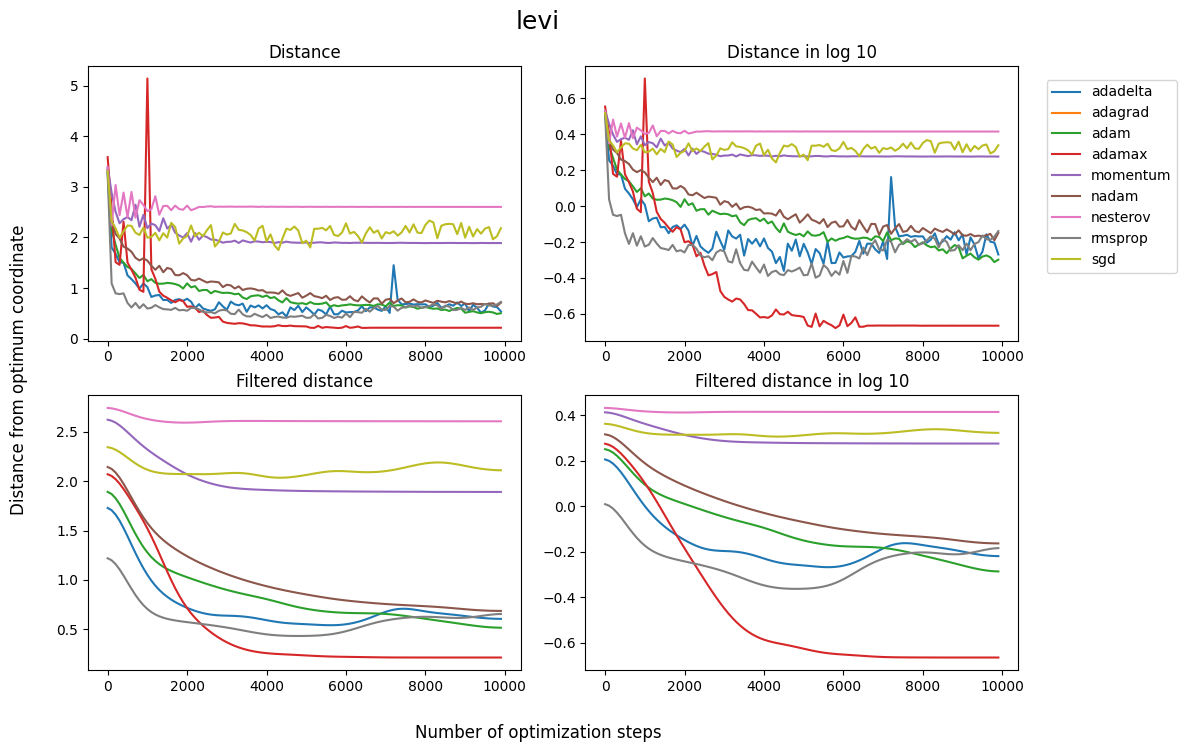

In [6]:
show('levi')

### Rastrigin

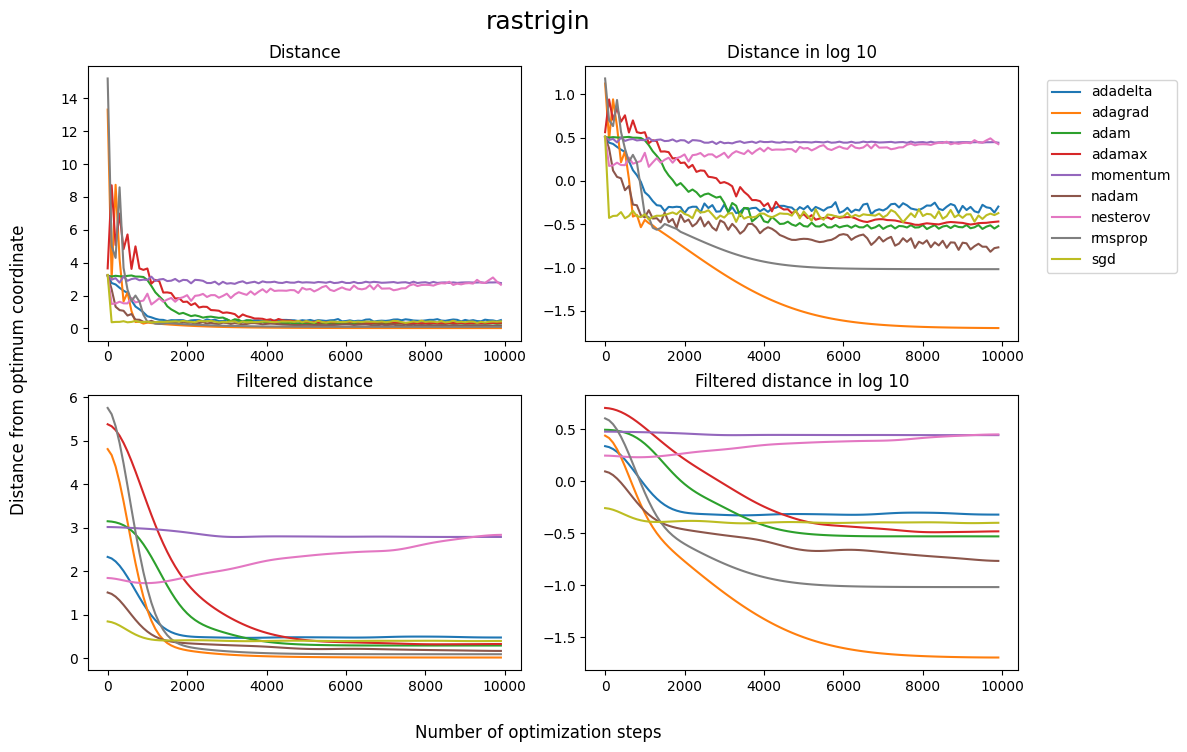

In [7]:
show('rastrigin')

## Standard Deviation and Min Loss

### Ackley

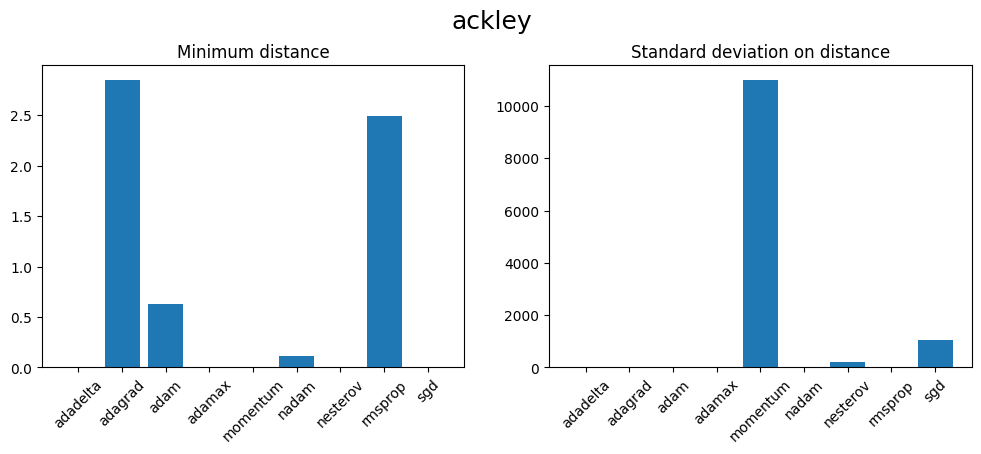

In [8]:
show_minstd('ackley')

### Bukin

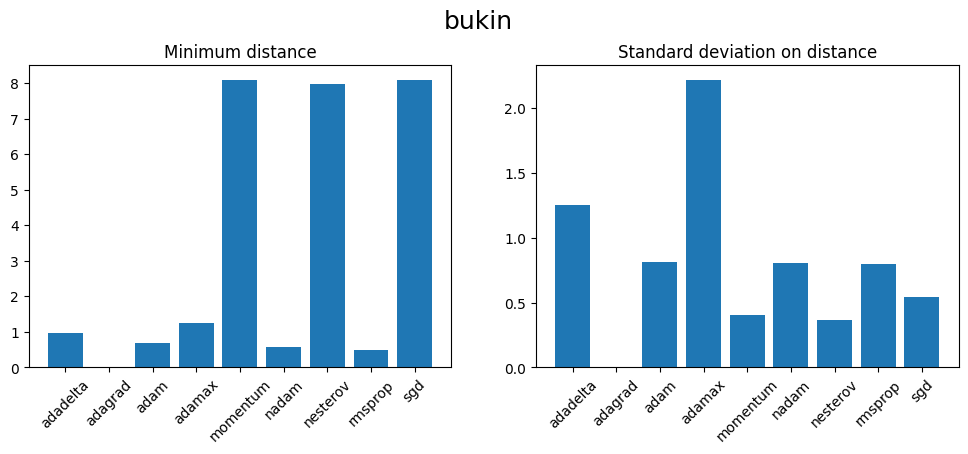

In [9]:
show_minstd('bukin')

### Rosenbrock

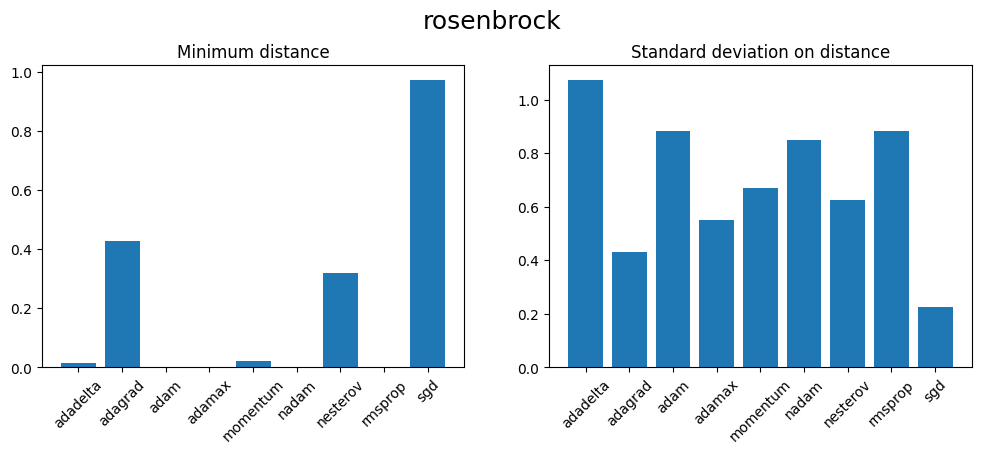

In [10]:
show_minstd('rosenbrock')

### Levi

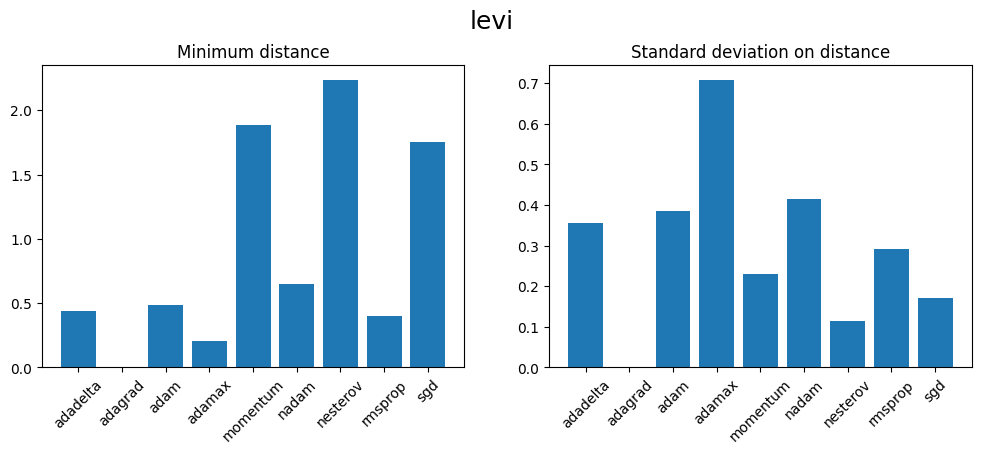

In [11]:
show_minstd('levi')

### Rastrigin

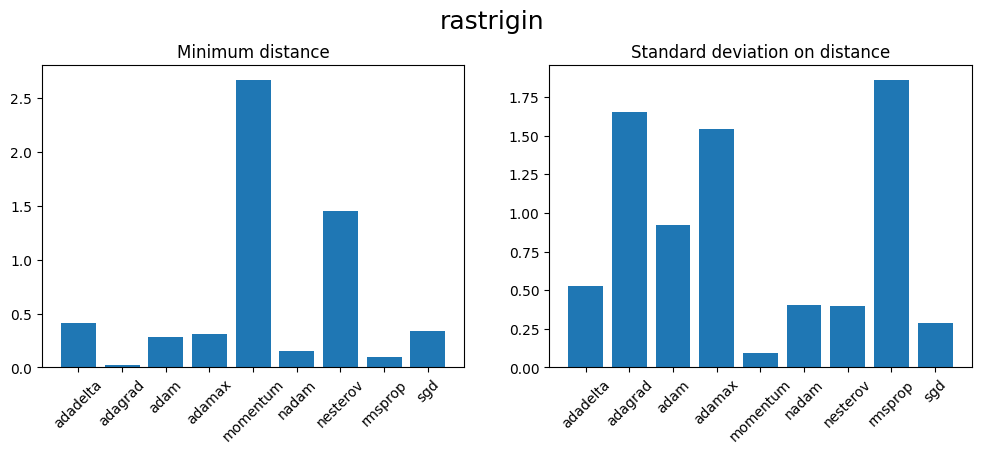

In [12]:
show_minstd('rastrigin')

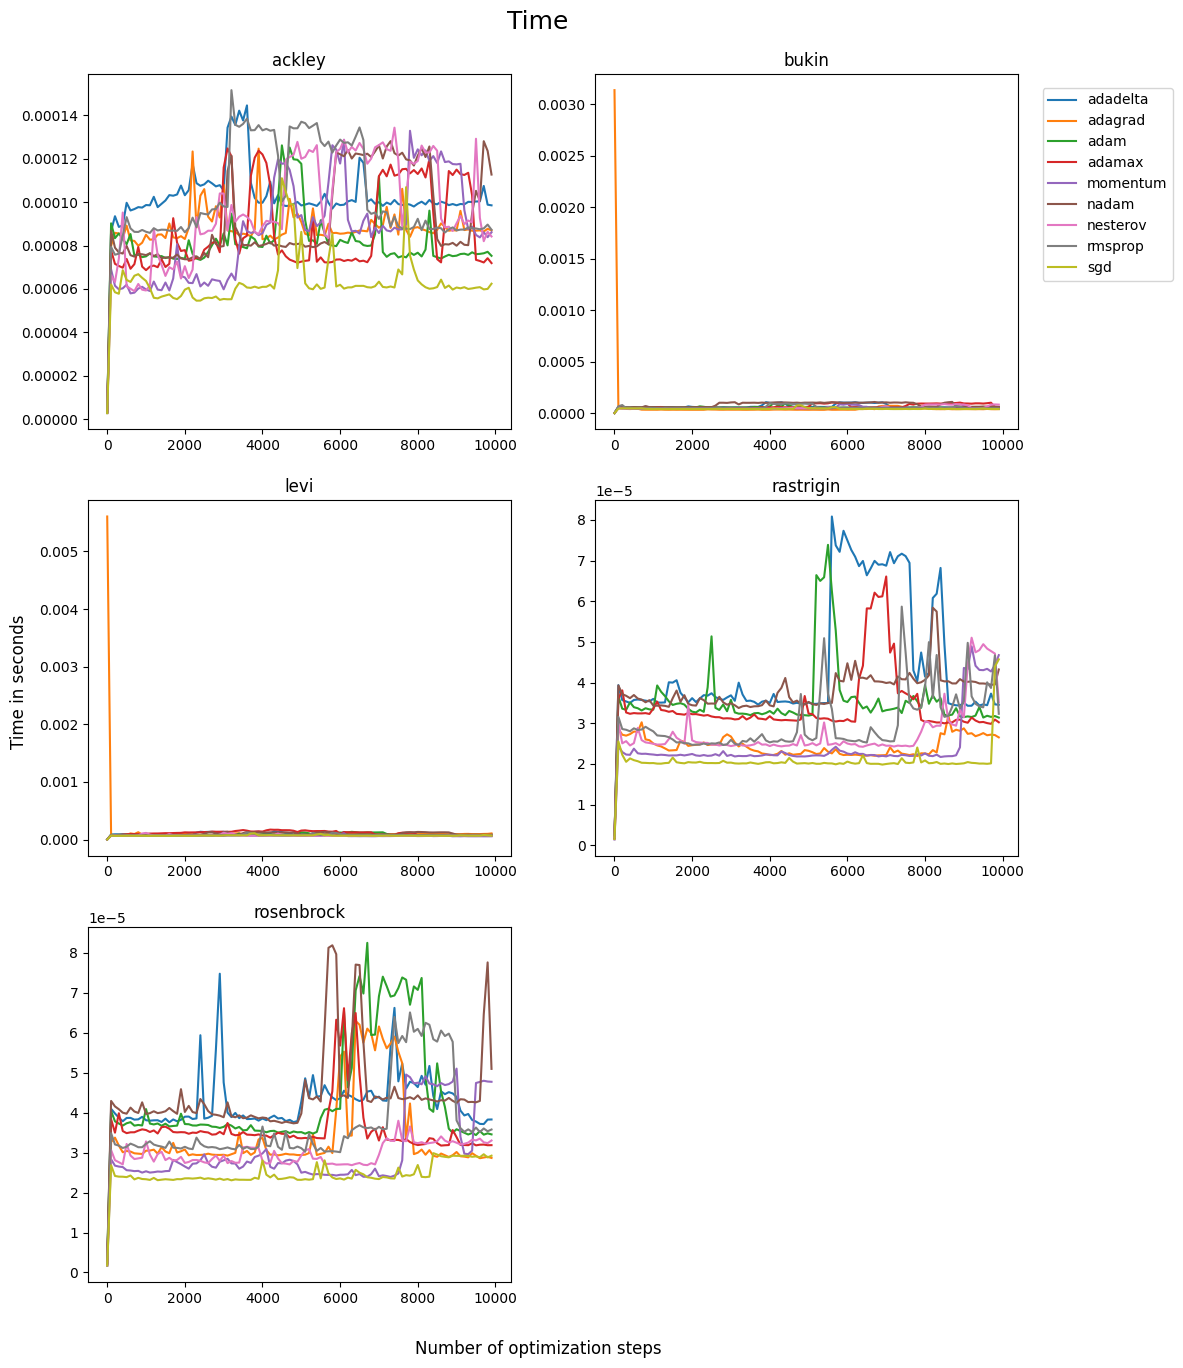

In [13]:
show_time()